In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_pickle('./saved-items/df.pkl')

df.head()

,Age,Education,Relationship_Status,Income,Seniority,Num_children,Has_child,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,64,Postgraduate,Alone,58138,9.241,0,False,635,88,546,172,88,88,1617
1,67,Postgraduate,Alone,46344,7.734,2,True,11,1,6,2,1,6,27
2,56,Postgraduate,Relationship,71613,8.279,0,False,426,49,127,111,21,42,776
3,37,Postgraduate,Relationship,26646,7.805,1,True,11,4,20,10,3,5,53
4,40,Postgraduate,Relationship,58293,7.866,1,True,173,43,118,46,27,15,422


In [3]:
df.dtypes

Age                      int64
Education               object
Relationship_Status     object
Income                   int64
Seniority              float64
Num_children             int64
Has_child                 bool
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
Total                    int64
dtype: object

## Convert Categorical Data to Numerical

In [4]:
# One Hot Encode Education column
df['Edu'] = df['Education'].apply(lambda x: 1 if x == "Postgraduate" else 0)
df['Child'] = df['Has_child'].apply(lambda x: 0 if x == False else 1)

# Label Encode the Relationship Status column
df['Single'] = df['Relationship_Status'].apply(lambda x: 1 if x == 'Alone' else 0)
df['Relationship'] = df['Relationship_Status'].apply(lambda x: 1 if x == 'Relationship' else 0)

In [5]:
df.head()

,Age,Education,Relationship_Status,Income,Seniority,Num_children,Has_child,Wines,Fruits,Meat,Fish,Sweets,Gold,Total,Edu,Child,Single,Relationship
0,64,Postgraduate,Alone,58138,9.241,0,False,635,88,546,172,88,88,1617,1,0,1,0
1,67,Postgraduate,Alone,46344,7.734,2,True,11,1,6,2,1,6,27,1,1,1,0
2,56,Postgraduate,Relationship,71613,8.279,0,False,426,49,127,111,21,42,776,1,0,0,1
3,37,Postgraduate,Relationship,26646,7.805,1,True,11,4,20,10,3,5,53,1,1,0,1
4,40,Postgraduate,Relationship,58293,7.866,1,True,173,43,118,46,27,15,422,1,1,0,1


In [6]:
num_df = df[['Age', 'Edu', 'Single', 'Relationship', 'Income', 
             'Seniority', 'Num_children', 'Child', 'Wines', 
             'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Total']]

In [7]:
num_df.head()

,Age,Edu,Single,Relationship,Income,Seniority,Num_children,Child,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,64,1,1,0,58138,9.241,0,0,635,88,546,172,88,88,1617
1,67,1,1,0,46344,7.734,2,1,11,1,6,2,1,6,27
2,56,1,0,1,71613,8.279,0,0,426,49,127,111,21,42,776
3,37,1,0,1,26646,7.805,1,1,11,4,20,10,3,5,53
4,40,1,0,1,58293,7.866,1,1,173,43,118,46,27,15,422


In [8]:
num_df.dtypes

Age               int64
Edu               int64
Single            int64
Relationship      int64
Income            int64
Seniority       float64
Num_children      int64
Child             int64
Wines             int64
Fruits            int64
Meat              int64
Fish              int64
Sweets            int64
Gold              int64
Total             int64
dtype: object

In [9]:
correlation_df = num_df.corr()

correlation_df

,Age,Edu,Single,Relationship,Income,Seniority,Num_children,Child,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
Age,1.000000,0.150562,-0.002742,0.002742,0.213892,-0.011718,0.092613,-0.012594,0.165217,0.014301,0.040568,0.042514,0.021999,0.062217,0.119028
Edu,0.150562,1.000000,0.021456,-0.021456,0.170706,-0.039106,0.048169,0.026338,0.154653,0.006447,0.091924,-0.026936,-0.026147,0.013409,0.117393
Single,-0.002742,0.021456,1.000000,-1.000000,0.011392,0.011348,-0.041488,-0.057790,0.007194,0.025961,0.031876,0.015231,0.016612,0.022591,0.021740
Relationship,0.002742,-0.021456,-1.000000,1.000000,-0.011392,-0.011348,0.041488,0.057790,-0.007194,-0.025961,-0.031876,-0.015231,-0.016612,-0.022591,-0.021740
Income,0.213892,0.170706,0.011392,-0.011392,1.000000,-0.025099,-0.349588,-0.409769,0.730689,0.537307,0.702905,0.551586,0.555735,0.416743,0.823645
Seniority,-0.011718,-0.039106,0.011348,-0.011348,-0.025099,1.000000,-0.025928,0.001215,0.167942,0.068373,0.090698,0.082550,0.081015,0.161545,0.158445
Num_children,0.092613,0.048169,-0.041488,0.041488,-0.349588,-0.025928,1.000000,0.799059,-0.356040,-0.396008,-0.513539,-0.428121,-0.391436,-0.267747,-0.500347
Child,-0.012594,0.026338,-0.057790,0.057790,-0.409769,0.001215,0.799059,1.000000,-0.345349,-0.411579,-0.586141,-0.449993,-0.404827,-0.244919,-0.522597
Wines,0.165217,0.154653,0.007194,-0.007194,0.730689,0.167942,-0.356040,-0.345349,1.000000,0.385133,0.593755,0.397339,0.388580,0.391378,0.897616
Fruits,0.014301,0.006447,0.025961,-0.025961,0.537307,0.068373,-0.396008,-0.411579,0.385133,1.000000,0.568336,0.591464,0.571195,0.390442,0.614031


We want to group customers by how much they spend, so we will choose columns with high correlation values with `Total` column

In [10]:
# Strong positive correlation with 'Total'
pos_corr = correlation_df['Total'][(correlation_df['Total'] >= 0.5)]
pos_corr

Income    0.823645
Wines     0.897616
Fruits    0.614031
Meat      0.857106
Fish      0.644740
Sweets    0.609521
Gold      0.529779
Total     1.000000
Name: Total, dtype: float64

In [11]:
# Strong negative correlation with 'Total'
neg_corr = correlation_df['Total'][(correlation_df['Total'] <= -0.5)]
neg_corr

Num_children   -0.500347
Child          -0.522597
Name: Total, dtype: float64

All items

In [12]:
X = num_df[neg_corr.index.tolist() + pos_corr.index.tolist()]

X.head()

,Num_children,Child,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,0,0,58138,635,88,546,172,88,88,1617
1,2,1,46344,11,1,6,2,1,6,27
2,0,0,71613,426,49,127,111,21,42,776
3,1,1,26646,11,4,20,10,3,5,53
4,1,1,58293,173,43,118,46,27,15,422


Remove the singular items

In [13]:
X = num_df[['Num_children', 'Child', 'Income', 'Total']]

X.head()

,Num_children,Child,Income,Total
0,0,0,58138,1617
1,2,1,46344,27
2,0,0,71613,776
3,1,1,26646,53
4,1,1,58293,422


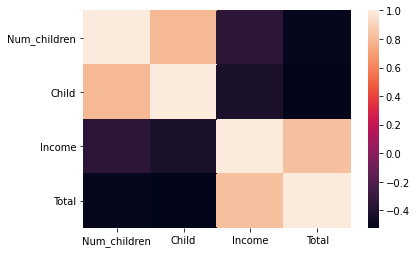

In [14]:
sns.heatmap(X.corr())
plt.show()

## Scale the data between 0 and 1

In [15]:
scaler = MinMaxScaler()

In [16]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled.head()

,Num_children,Child,Income,Total
0,0.000000,0.0,0.503625,0.639683
1,0.666667,1.0,0.398325,0.008730
2,0.000000,0.0,0.623933,0.305952
3,0.333333,1.0,0.222456,0.019048
4,0.333333,1.0,0.505009,0.165476


# K Means Clustering

We will use inertia and silhouette scores to determine what is the best number of clusters

In [17]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
scores   = {}
inertias = {}

for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init=50, algorithm='full')
    kmeans.fit(X_scaled)
    scores[i] = silhouette_score(X_scaled, kmeans.labels_)
    inertias[i] = kmeans.inertia_

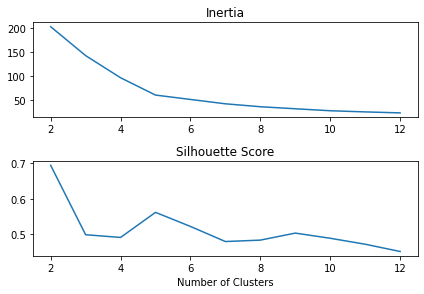

In [18]:
# Two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2)

# Inertia
ax1.plot(inertias.keys(), inertias.values())
ax1.set_title('Inertia')

# Silhouette Score
ax2.plot(scores.keys(), scores.values())
ax2.set_title('Silhouette Score')

# Spacing
fig.tight_layout()

# X-Axis Label
plt.xlabel('Number of Clusters')

plt.show()

4 clusters seems to be the best, according to the inertia and silhouette score

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [20]:
X_scaled['labels'] = kmeans.labels_

In [21]:
X.head()

,Num_children,Child,Income,Total
0,0,0,58138,1617
1,2,1,46344,27
2,0,0,71613,776
3,1,1,26646,53
4,1,1,58293,422


In [22]:
X_scaled.head()

,Num_children,Child,Income,Total,labels
0,0.000000,0.0,0.503625,0.639683,3
1,0.666667,1.0,0.398325,0.008730,0
2,0.000000,0.0,0.623933,0.305952,3
3,0.333333,1.0,0.222456,0.019048,2
4,0.333333,1.0,0.505009,0.165476,2


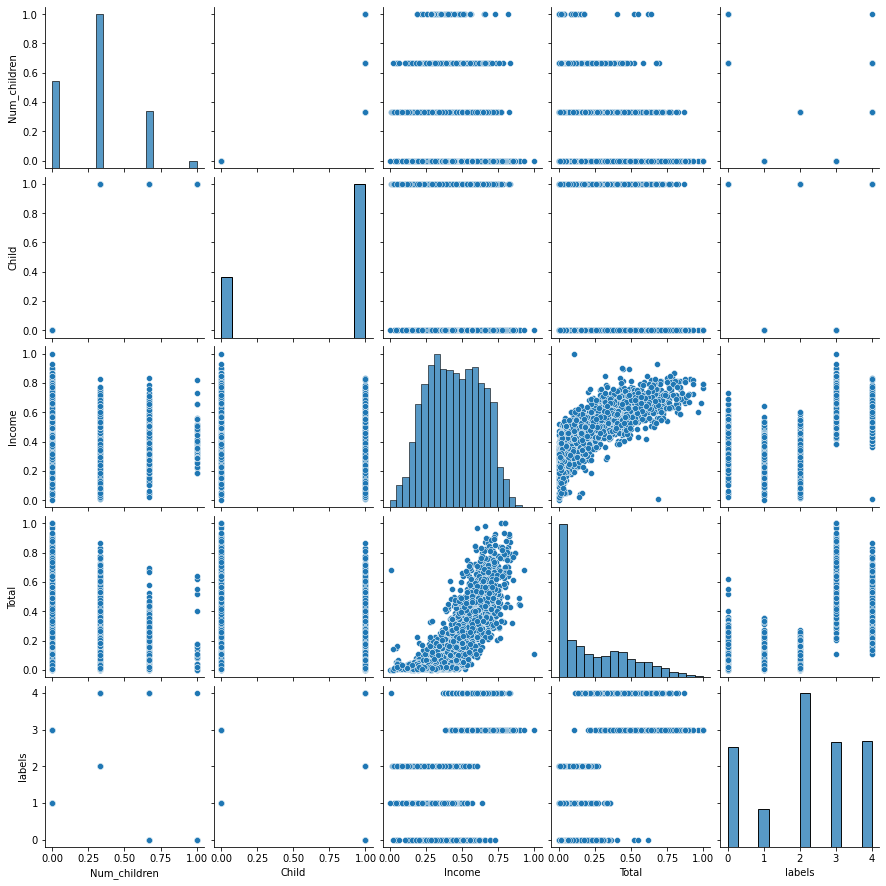

In [23]:
sns.pairplot(X_scaled)
plt.show()